<a href="https://colab.research.google.com/github/VIVEK818713/machine-learning-algorithm/blob/main/1_simple_linear_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
##Regression is a ‘Supervised machine learning’ algorithm used to predict continuous features.

##Linear regression is the simplest regression algorithm that attempts to model the relationship between dependent variable and one or more independent variables by fitting a linear equation/best fit line to observed data.

##Based on the number of input features, Linear regression could be of two types:

##Simple Linear Regression (SLR)
##Multiple Linear Regression (MLR)
##In Simple Linear Regression (SLR), we will have a single input variable based on which we predict the output variable. Where in Multiple Linear Regression (MLR), we predict the output based on multiple inputs.

#simple linear regression
##We all know that the equation of the line
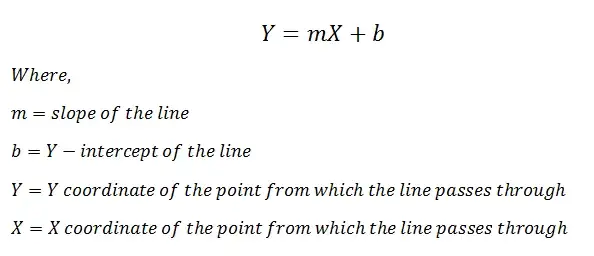

## lets understand simple linear regression with the code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/placement SLR.csv')

In [ ]:
df.head()

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
m = lr.coef_

In [ ]:
b = lr.intercept_

In [ ]:
# y = mx + b

m * 8.58 + b

In [ ]:
m * 9.5 + b

In [ ]:
m * 100 + b


## as we know the equation of line is y=mx+b and we have to find m and b for the best line. m and b can be calulated by 2 ways
#1. closed form---we have direct formula or ordinary least squre(OLS)
## first we discuss this technique.scikit libaray use this technique internally
#2. non-closed form ---gradient decent
## question is this why we use gradient descent when we have direct formulla , the answer is because when we deal with higher dimnesion direct formulla not give good result for m and b 
##in OLS we use linearregression libaray
## in gradient descent we use SGDRegressor

## formlla for PLS for calculting m and b is
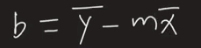

  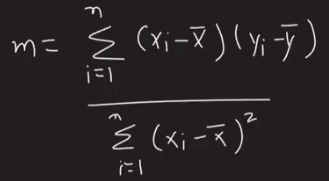

## first we have tocalculate m after this we calculate b. xbar and ybar is mean.

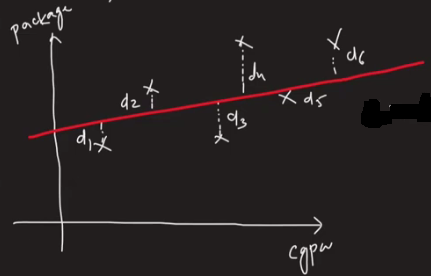

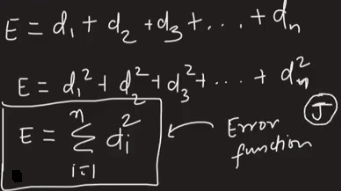

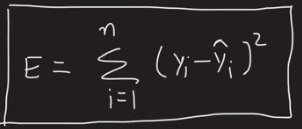

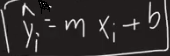

## we have to find m and b with below expresion minimum value
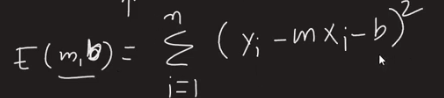

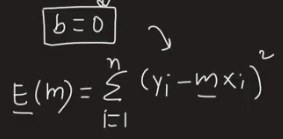

## when m=1
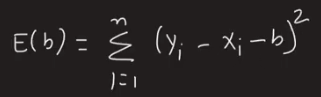

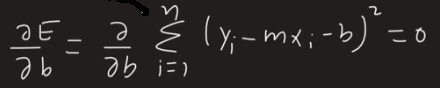

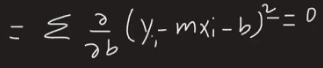

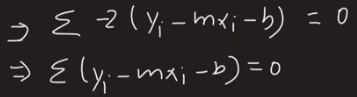

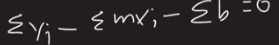

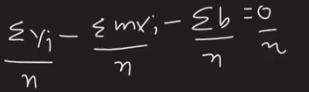

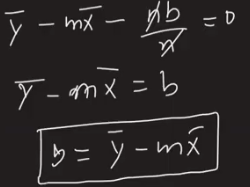

## Now for calculation of m
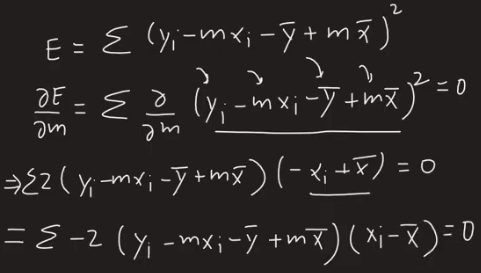

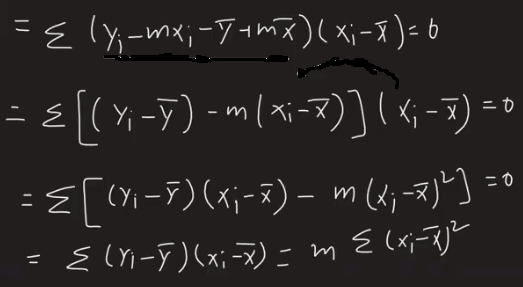

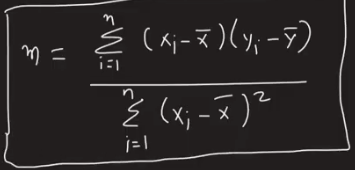

## Lets implement simple linear regression  using above discussion.

In [ ]:
class SLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b  

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/placement SLR.csv')

In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

In [ ]:
lr = SLR()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
X_train.shape[0]

In [ ]:
X_train[0]

In [ ]:
X_train.mean()

In [ ]:
X_test[0]

In [ ]:
print(lr.predict(X_test[0]))

#Regression Metrices
##1.MAE(mean absolute error):In the context of machine learning, absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation. MAE takes the average of absolute errors for a group of predictions and observations as a measurement of the magnitude of errors for the entire group. MAE can also be referred as L1 loss function.
##As one of the most commonly used loss functions for regression problems, MAE helps users to formulate learning problems into optimization problems. It also serves as an easy-to-understand quantifiable measurement of errors for regression problems.
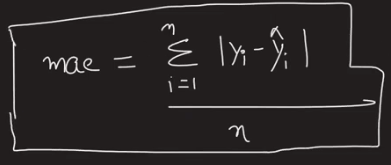

## By this calculation we get a number which is basically a loss means MAE is the loss.our target is to reduce or minimize this loss.means MAE SHOULD BE MINIMIED.
## unit of MAE and unit of output column is always same.means if your target column is in lpa(lakh per annum) then MAE is also in lpa.
## it can handle the outliers means it is robust to outliers.
## as we are using modulus here and we know the mod is not differntiable at 0.so we can not apply optimization technique in MAE.This problem can be solved by MSE(MEAN SQURED ERROR)

##2. MSE(Mean Squared Error): it is same as MAE but we donot use mod in MSE we use squre of actual value minus predited value.
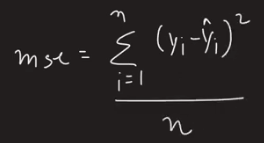

## it is used as loss function.because it is diffrentiable.
## if your target column unit is lpa then MSE unit will be lpa squre so it is hard to interpret.
## it penelize very much ouliers . so you can say it is not robust to outliers.

##3. RMSE(Root Mean Squre Error): it is root of MSE. means
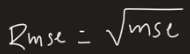 

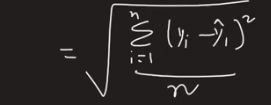

## RMSE is also differentiable like MSE .
## the output unit of RMSE is the same as target column unit. 
## this is not robust to outliers

##4.R2 SCORE: to undersatn it lets create a case assume we have dataset which have 2 column cgpa and package(lpa). if you donot have value of cgpa then someone ask what will be my package then you will take mean of packsge and tell him your package will be mean of package.But it is the worst case . 
## But here we have cgpa column so we will draw a regression line which is best fit line and it is the prediction.
## so the bad assumption is mean and the best assumption is to use regression line.
## in the fig red line is for mean and blue line is for regression line.
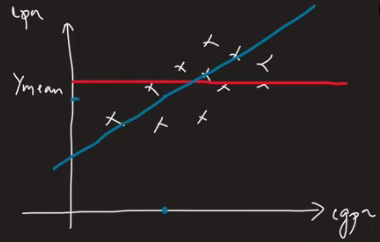

## so basically when you use r2 score then you compare your regression line with mean line and observe how much better your regression line with your mean line.
##it is also called coefficient of determination 
## some time it is called goodness of fit.
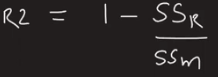


## SSr ---sum of squred error in the regression line
## SSm ---sum of squred error in the mean line
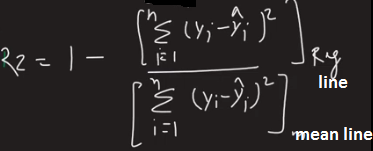

## How to interpret r2 score
##  lets assume your r2 score=0 it means SSr/SSm term is 1. but when it will be 1. means your mean line error is equal to regression lie error. it means that regression line overlap on mean line . in our case it means there is no effect of cgpa means there is no existance of cgpa colmn you are just calculating package mean.
## if your r2 score =1. it means your SSr(rgression line) should be 0. means your regression line have no error . each and every point is lying on the best fit line. if you move on perfection your r2 score move to 1.And if you move to mean line then your r2 score move to 0.
## you have to make sure your r2 score move toward 1 not 0.
## what if our r2 score is negative? it is very rare.it means your ratio of SSr/SSm > 1. it is happen when SSr>SSm. it means there is a lot of error in regression line then mean line. it means you do not understand your data and you apply other algorithm on your data.means your data is highly non linear and you applied linear algorithm on it.

## how to read r2 score?
## lets assume we have 2 column cgpa and package(lpa) and our r2 score is .80 it means our cgpa which is our input column is able to expalin 80% of varience in package(lap) column. what about 20% varience we dont know .
## lets assume we have now 3 column cgpa,iq and package(lpa) and our r2 score is .80 means cgpa and iq together gives 80% varience in package(lpa) column.

#5.Adjusted R2 score:
## if you have 2 column cgpa and package(lpa) and your r2 score is .80 then it is good but when we add 1 more column like 'iq' then its r2 score should be increased lets assume now it is .90 which is obviuos.because it is a relevent column.
## But what happen when we add 1 irrelevant column like'temprature'  our r2 score sholud be decreased because it is irrelevat column but it is either constant or increased. **To handle this case Adjusted r2 score come into the picture**
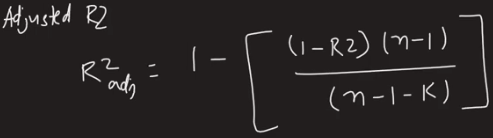

## r2 is r2 score, n is no.of rows, k is independant columns.
## case 1 when you added irrelevant column like 'temprature' in cgpa,package(lpa). then your adjusted r2 score will be decresed.
## case 2 when we added relevat column like'iq' in cgpa and package(lpa) . then your adjusted r2 score will be increased.
## adjusted r2 score is very reliable when you are working with multiple linear regression.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/csv data/placement SLR.csv')
df.head()

In [ ]:
df.shape

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_test.values

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))

In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
print("R2 Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [ ]:
# Adjusted R2 score
X_test.shape

In [ ]:
1 - ((1-r2)*(40-1))/(40-1-1)

In [ ]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [ ]:
1 - ((1-r2)*(40-1)/(40-1-2))

In [ ]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [ ]:
new_df2.sample(5)

In [ ]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [ ]:
np.random.randint(-100,100)

In [ ]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [ ]:
1 - ((1-r2)*(40-1)/(40-1-2))